In [1]:
import numpy as np
from CALS10kfield import cField

In [2]:
fAdres = './CALS10k.2'
time = 1900
#lon = 30
#lat = 40
#print(cField(fAdres,time,lat,lon).field)

In [ ]:
'''
an example of global field at 1900 yr.AD
'''

In [12]:
import itertools
lats = np.arange(-90,91,step=30)
#lats = [-90,-75,-60,-45,-35,-25,-15,-5,0,5,15,25,35,45,60,75,90]
lons = np.arange(0,361,step=30)

lat_ = []
lon_ = []
B = []
f_ = []
i_ = []
d_ = []

for lat,lon in itertools.product(lats,lons):
    #print(lat,lon)
    lat_.append(lat)
    lon_.append(lon)
    d,i,f = cField(fAdres,time,lat,lon).field
    f_.append(f)
    i_.append(i)
    d_.append(d)

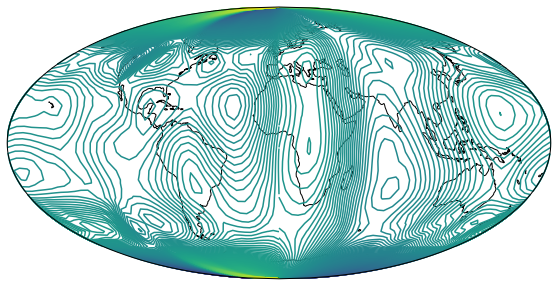

In [13]:
import cartopy.crs as ccrs
from scipy.interpolate import griddata
from matplotlib import pyplot as plt
#print(d_)

'''
declination
'''
lat_m, lon_m = np.meshgrid(np.arange(-90,91,step=5),np.arange(0,361,step=5))
decl = griddata((lat_,lon_),d_,(lat_m,lon_m),method='cubic')

#plt.contour(lon_m,lat_m,Z,levels=100)
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection=ccrs.Mollweide())

ax.contour(lon_m,lat_m,decl,
            transform=ccrs.PlateCarree(),
            levels=500)
ax.coastlines()
ax.set_global()

plt.show()

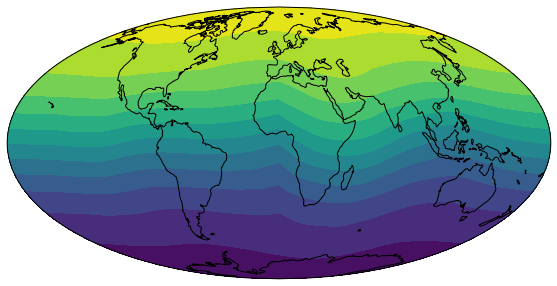

In [14]:
'''
inclination
'''
#lat_m, lon_m = np.meshgrid(np.arange(-90,91,step=5),np.arange(0,361,step=5))
incl = griddata((lat_,lon_),i_,(lat_m,lon_m),method='cubic')
#plt.contourf(lon_m,lat_m,F,levels=40)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection=ccrs.Mollweide())

ax.contourf(lon_m,lat_m,incl,
            transform=ccrs.PlateCarree(),
            levels=16)
ax.coastlines()
ax.set_global()

plt.show()

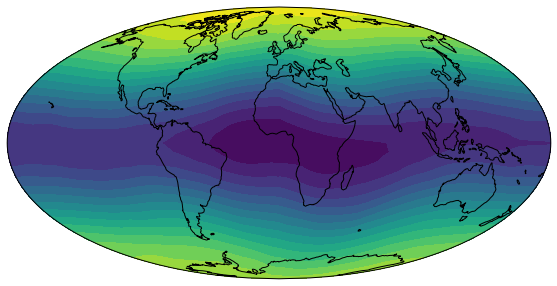

In [15]:
'''
intensity
'''
lat_m, lon_m = np.meshgrid(np.arange(-90,91,step=5),np.arange(0,361,step=5))
F = griddata((lat_,lon_),f_,(lat_m,lon_m),method='cubic')
#plt.contourf(lon_m,lat_m,F,levels=40)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection=ccrs.Mollweide())

ax.contourf(lon_m,lat_m,F,
            transform=ccrs.PlateCarree(),
            levels=16)
ax.coastlines()
ax.set_global()

plt.show()

In [20]:
'''
below is an example of one site
'''

In [16]:
times = np.arange(-9000,1500,step=100)
lon = 30
lat = 40

f_ = []
i_ = []
d_ = []
for time in times:
    d,i,f = cField(fAdres,time,lat,lon).field
    f_.append(f)
    i_.append(i)
    d_.append(d)

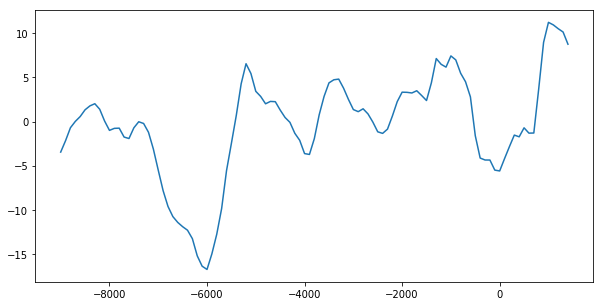

In [18]:
'''
declination
'''
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(times,d_)
#print(f_)

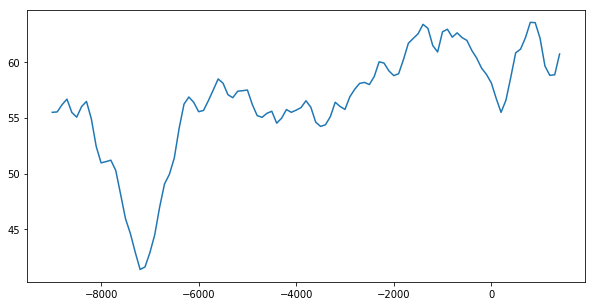

In [22]:
'''
inclination
'''
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(times,i_)
#print(f_)

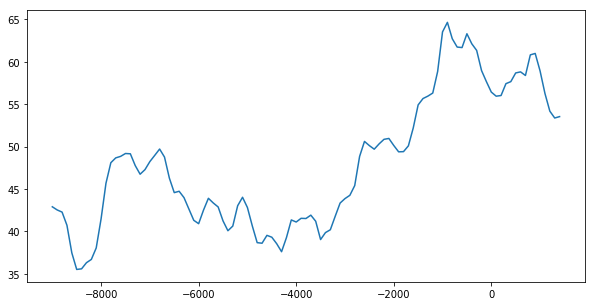

In [23]:
'''
intensity
'''
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(times,f_)
#print(f_)